<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/homeworks/hw_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# MAT281 - Tarea N°02


## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__:

* __Rol__:

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
   
4.- Esta Tarea debe ser entregada en **Dos Jupyter Notebooks Distinto**.
   * **Ejemplo**: `hw_02_part_01.ipynb`, `hw_02_part_02.ipynb`.

## II.- Titanic - Machine Learning from Disaster

<img src="https://i.pinimg.com/originals/8c/ef/e7/8cefe799c4d5d2ad4ad7f6524d3838f4.png" width = "400" align="center"/>


El desafío **Titanic - Machine Learning from Disaster** en [Kaggle](https://www.kaggle.com/competitions/titanic/overview/description) invita a predecir qué pasajeros sobrevivieron al naufragio del Titanic mediante un modelo de machine learning. Utiliza datos reales de los pasajeros, como su nombre, edad, género y clase socioeconómica, para explorar patrones de supervivencia y construir un modelo predictivo. Este es uno de los desafíos más populares de Kaggle y un excelente punto de partida para aprender sobre machine learning y análisis de datos.

### Pasos para participar:

1. **Unirse a la competencia**:
   - [Crea una cuenta o inicia sesión en Kaggle](https://www.kaggle.com/account/login?returnUrl=%2Fc%2Ftitanic) y acepta las reglas para acceder a los datos de la competencia.
   
2. **Descargar y explorar los datos**:
   - Descarga los archivos `train.csv` y `test.csv` desde la [página de datos](https://www.kaggle.com/competitions/titanic/data).
   - `train.csv` contiene información de 891 pasajeros, incluyendo si sobrevivieron o no (columna `Survived`). En `test.csv`, se oculta esta columna para que tu modelo prediga la supervivencia de 418 pasajeros adicionales.

3. **Desarrollar el modelo**:
   - Usa `train.csv` para explorar y descubrir patrones, luego entrena un modelo de machine learning que pueda predecir la supervivencia en `test.csv`. Un recurso útil para aprender es el [tutorial de Alexis Cook](https://www.kaggle.com/alexisbcook/titanic-tutorial), que explica paso a paso cómo hacer tu primera predicción.
   - Puedes explorar notebooks de otros participantes para inspiración y técnicas avanzadas en la [sección de notebooks](https://www.kaggle.com/c/titanic/notebooks).

4. **Realizar una predicción y enviar tu archivo**:
   - El archivo CSV de predicciones debe tener dos columnas: `PassengerId` y `Survived`. Puedes consultar un ejemplo en el archivo `gender_submission.csv` disponible en la [página de datos](https://www.kaggle.com/competitions/titanic/data).
   - Sube tu archivo en la sección de envíos y revisa tu puntaje de precisión, que mide el porcentaje de pasajeros que tu modelo predijo correctamente.

5. **Revisar el leaderboard y mejorar el modelo**:
   - Ve tu posición en el [leaderboard](https://www.kaggle.com/c/titanic/leaderboard) y mejora tu modelo basándote en ideas de los foros o pruebas adicionales.

### Ayuda y recursos adicionales:

- [Foro de discusión del Titanic](https://www.kaggle.com/c/titanic/discussion): Un espacio donde puedes hacer preguntas y ver consejos de otros participantes.
- [Vídeo sobre la jerga de Kaggle](https://www.youtube.com/watch?v=sEJHyuWKd-s) por Dr. Rachael Tatman, para entender mejor los términos comunes en Kaggle.
- [Notebooks de la competencia](https://www.kaggle.com/c/titanic/notebooks): Revisa notebooks compartidos para ver cómo otros abordan el desafío.

Este desafío es ideal para principiantes en machine learning y permite practicar desde la limpieza de datos hasta el desarrollo y evaluación de modelos.

In [78]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import listdir
from os.path import isfile, join

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df_train=pd.read_csv(os.path.join('titanic','train.csv'))
df_test=pd.read_csv(os.path.join('titanic','test.csv'))

Veamos los conjuntos de testeo y entrenamiento.

In [79]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Veamos informacion del conjunto de entrenamiento.

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos ver que todas las columnas excepto "age", "cabin" y "embarked" no tienen datos nulos. Ademas, tiene datos categoricos. Como sera dificil extraer informacion de la cabina por la falta de informacion, no vamos a considerar esta columna en el analisis. Similarmente, el ID de pasagero, el nombre, el numero de ticket y el lugar de embarcamiento no se consideraran variables que afecten a la tasa de supervivencia, luego tambien se van a botar del dataset

In [82]:
df_train_filter=df_train.copy()
df_train_filter=df_train_filter.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])
df_train_filter

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


Separemos las columnas en numericas y categoricas.

In [83]:
num_cols=[col for col in df_train_filter.columns if df_train_filter[col].dtype in ['int64', 'float64']]
cat_cols=[col for col in df_train_filter.columns if df_train_filter[col].dtype=='object']

In [84]:
num_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [85]:
cat_cols

['Sex']

Para poder correlacionar el genero con la supervivencia, transformemosla en una variable numerica. Para esto, consideremos 0 cuando el pasajero es hombre y 1 cuando la pasajera es mujer.

In [86]:
df_train_filter['Sex']=df_train_filter['Sex'].map({'male': 0, 'female': 1})
df_train_filter

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


Ademas, para no causar problemas, botemos todas las entradas que tengan algun dato nulo.

In [87]:
df_train_filter=df_train_filter.dropna()
df_train_filter

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


Hagamos el mismo procedimiento con el conjunto de testeo.

In [88]:
df_test_filter=df_test.copy()
df_test_filter=df_test_filter.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])
df_test_filter['Sex']=df_test_filter['Sex'].map({'male': 0, 'female': 1})
df_test_filter

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,3,0,38.5,0,0,7.2500
416,3,0,NaN,0,0,8.0500


Veamos la correlacion entre las variables en el conjunto de entrenamiento.

<Axes: >

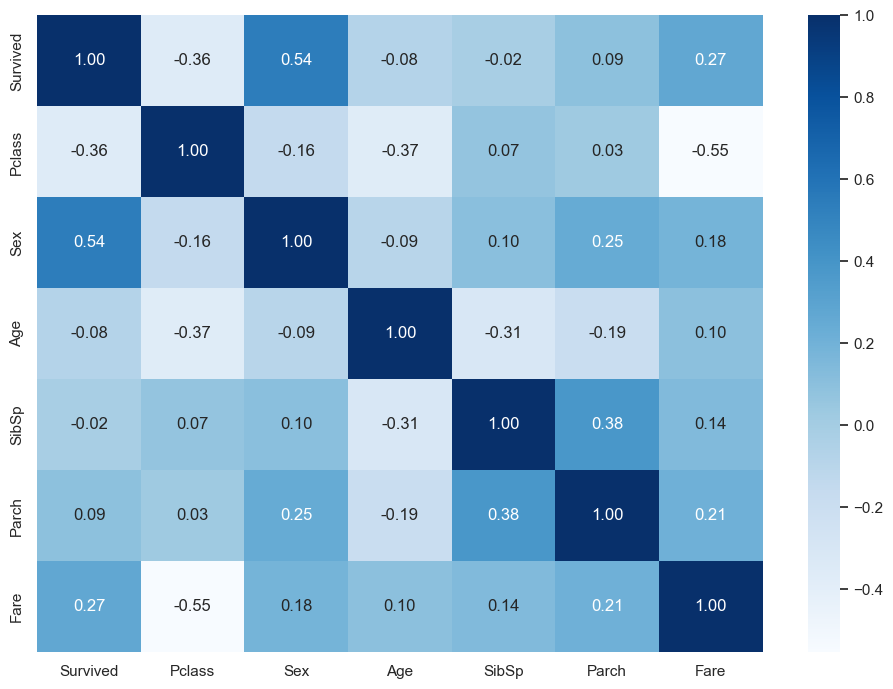

In [89]:
sns.heatmap(df_train_filter.corr(), annot=True, cmap='Blues', fmt='.2f')

Podemos ver que las correlacion mas alta de la supervivencia es el sexo. Entrenemos un modelo para predecir de mejor forma la supervivencia a partir de estos datos.

In [90]:
X = df_train_filter.drop('Survived', axis=1)
y = df_train_filter['Survived']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=1)

Vamos a utilizar los modelos de:

__1: Regresion logistica__

In [91]:
# Definir el modelo base
model = LogisticRegression()

# Rango de parámetros para Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500, 1000]
}

# Configuración y aplicación de Grid Search
gs = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',    # Métrica de evaluación
    cv=5,                  # Número de particiones de validación cruzada
    n_jobs=-1              # Usar todos los núcleos disponibles para acelerar el proceso
)

# Entrenamiento de Grid Search
gs.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejor precisión en validación cruzada:", gs.best_score_)
print("Mejores parámetros:", gs.best_params_)

# Entrenar y evaluar el mejor modelo en el conjunto de evaluación
mejor_modelo_lr = gs.best_estimator_
mejor_modelo_lr.fit(X_train, y_train)
print("Precisión en el conjunto de evaluación: {:.3f}".format(mejor_modelo_lr.score(X_eval, y_eval)))

Mejor precisión en validación cruzada: 0.8037383177570092
Mejores parámetros: {'C': 0.1, 'max_iter': 100}
Precisión en el conjunto de evaluación: 0.804


__2: Support Vector Machine__

In [92]:
# Definir el modelo base
model = SVC()

# Rango de parámetros para Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'degree': [1, 2, 3]
}

# Configuración y aplicación de Grid Search
gs = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',    # Métrica de evaluación
    cv=5,                  # Número de particiones de validación cruzada
    n_jobs=-1              # Usar todos los núcleos disponibles para acelerar el proceso
)

# Entrenamiento de Grid Search
gs.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejor precisión en validación cruzada:", gs.best_score_)
print("Mejores parámetros:", gs.best_params_)

# Entrenar y evaluar el mejor modelo en el conjunto de evaluación
mejor_modelo_svc = gs.best_estimator_
mejor_modelo_svc.fit(X_train, y_train)
print("Precisión en el conjunto de evaluación: {:.3f}".format(mejor_modelo_svc.score(X_eval, y_eval)))

Mejor precisión en validación cruzada: 0.7383177570093458
Mejores parámetros: {'C': 100, 'degree': 1}
Precisión en el conjunto de evaluación: 0.810


__3: Random Forest__

In [93]:
# Definir el modelo base
model = RandomForestClassifier(random_state=1)

# Rango de parámetros para Grid Search
param_grid = {
    'n_estimators': [10, 20, 50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, 25],
}

# Configuración y aplicación de Grid Search
gs = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',    # Métrica de evaluación
    cv=5,                  # Número de particiones de validación cruzada
    n_jobs=-1              # Usar todos los núcleos disponibles para acelerar el proceso
)

# Entrenamiento de Grid Search
gs.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejor precisión en validación cruzada:", gs.best_score_)
print("Mejores parámetros:", gs.best_params_)

# Entrenar y evaluar el mejor modelo en el conjunto de evaluación
mejor_modelo_rf = gs.best_estimator_
mejor_modelo_rf.fit(X_train, y_train)
print("Precisión en el conjunto de evaluación: {:.3f}".format(mejor_modelo_rf.score(X_eval, y_eval)))

Mejor precisión en validación cruzada: 0.811214953271028
Mejores parámetros: {'max_depth': 5, 'n_estimators': 20}
Precisión en el conjunto de evaluación: 0.860


Podemos ver que el modelo de Random Forest resulto ser el mejor en clasificar de los 3. Creemos un archivo ahora prediciendo la supervivencia a partir de la informacion de "test.csv", y creemos un dataframe que tenga el id del pasajero junto a su prediccion de supervivencia.

In [106]:
df_test_filter=df_test_filter.fillna(df_test_filter.median())
model = RandomForestClassifier(random_state=1,max_depth=5,n_estimators=20)
df_train_fit=model.fit(X_train, y_train)
y_test_pred=model.predict(df_test_filter)
df_pred=pd.DataFrame()
df_pred['PassengerId']=df_test['PassengerId']
df_pred['Survived']=y_test_pred.astype('int32')
df_pred=df_pred.set_index('PassengerId')
df_pred

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


Ahora, con este dataframe creemos un archivo .csv para ver el puntaje que obtendremos en Kaggle.

In [107]:
df_pred.to_csv('submission.csv')

Al ingresar este archivo a Kaggle, se obtuvo un puntaje de 0.78708.